# Filtración VR

In [1]:
import numpy as np
import pandas as pd

In [14]:
p = 2
epsilon = .0001

In [3]:
data = np.genfromtxt("Filtracion VR.csv", delimiter=",")
data = data[-750:-180]

import plotly.graph_objects as go
import numpy as np

layout = go.Layout(
    scene=dict(xaxis=dict(showbackground=False),
               yaxis=dict(showbackground=False),
               zaxis=dict(showbackground=False)),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

trace = go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], mode='markers',
                     marker=dict(color='black', size=4))

fig = go.Figure(data=[trace], layout=layout)

fig.show()

Es la pata del gato c:

In [4]:
def distance(point1, point2, p):
    return np.power(np.sum(np.power(np.abs(point1 - point2), p)), 1/p)

$$
\left( \sum_{i=1}^{n} |x_{i} - x_{j}|^p \right)^{\frac{1}{p}}
$$


In [5]:
def calculate_distance_matrix(dataset, p):
    distance_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            distance_matrix[i, j] = distance(dataset[i], dataset[j], p)
    return distance_matrix

In [15]:
distance_matrix = calculate_distance_matrix(data, p)

In [7]:
def vietoris_rips_filtration(distance_matrix, epsilon):
    n = distance_matrix.shape[0]
    complex = []

    def add_simplex(simplex, max_distance):
        complex.append(simplex)
        if len(simplex) < n:
            for i in range(max(simplex) + 1, n):
                new_distance = max(max_distance, distance_matrix[simplex[0], i])
                if new_distance <= epsilon:
                    add_simplex(simplex + [i], new_distance)

    for i in range(n):
        add_simplex([i], 0)

    return complex

In [16]:
complex = vietoris_rips_filtration(distance_matrix, epsilon)
print(f"Epsilon {epsilon}: {complex}")

Epsilon 0.0001: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [

# Diagrama de persistencia

In [24]:
from ripser import ripser
import matplotlib.pyplot as plt
import numpy as np

def barcode_homology_persistence(data, title, dimension):
    result = ripser(data, maxdim=dimension)
    diagrams = result['dgms']
    plt.figure(figsize=(15, 30))
    plt.suptitle(title)
    dgm = diagrams[dimension]
    for j, pt in enumerate(dgm):
        death = pt[1] if np.isfinite(pt[1]) else np.max(dgm[np.isfinite(dgm[:, 1]), 1]) * 2
        plt.plot([pt[0], death], [j, j], '-o')  
    plt.tight_layout()
    plt.show()

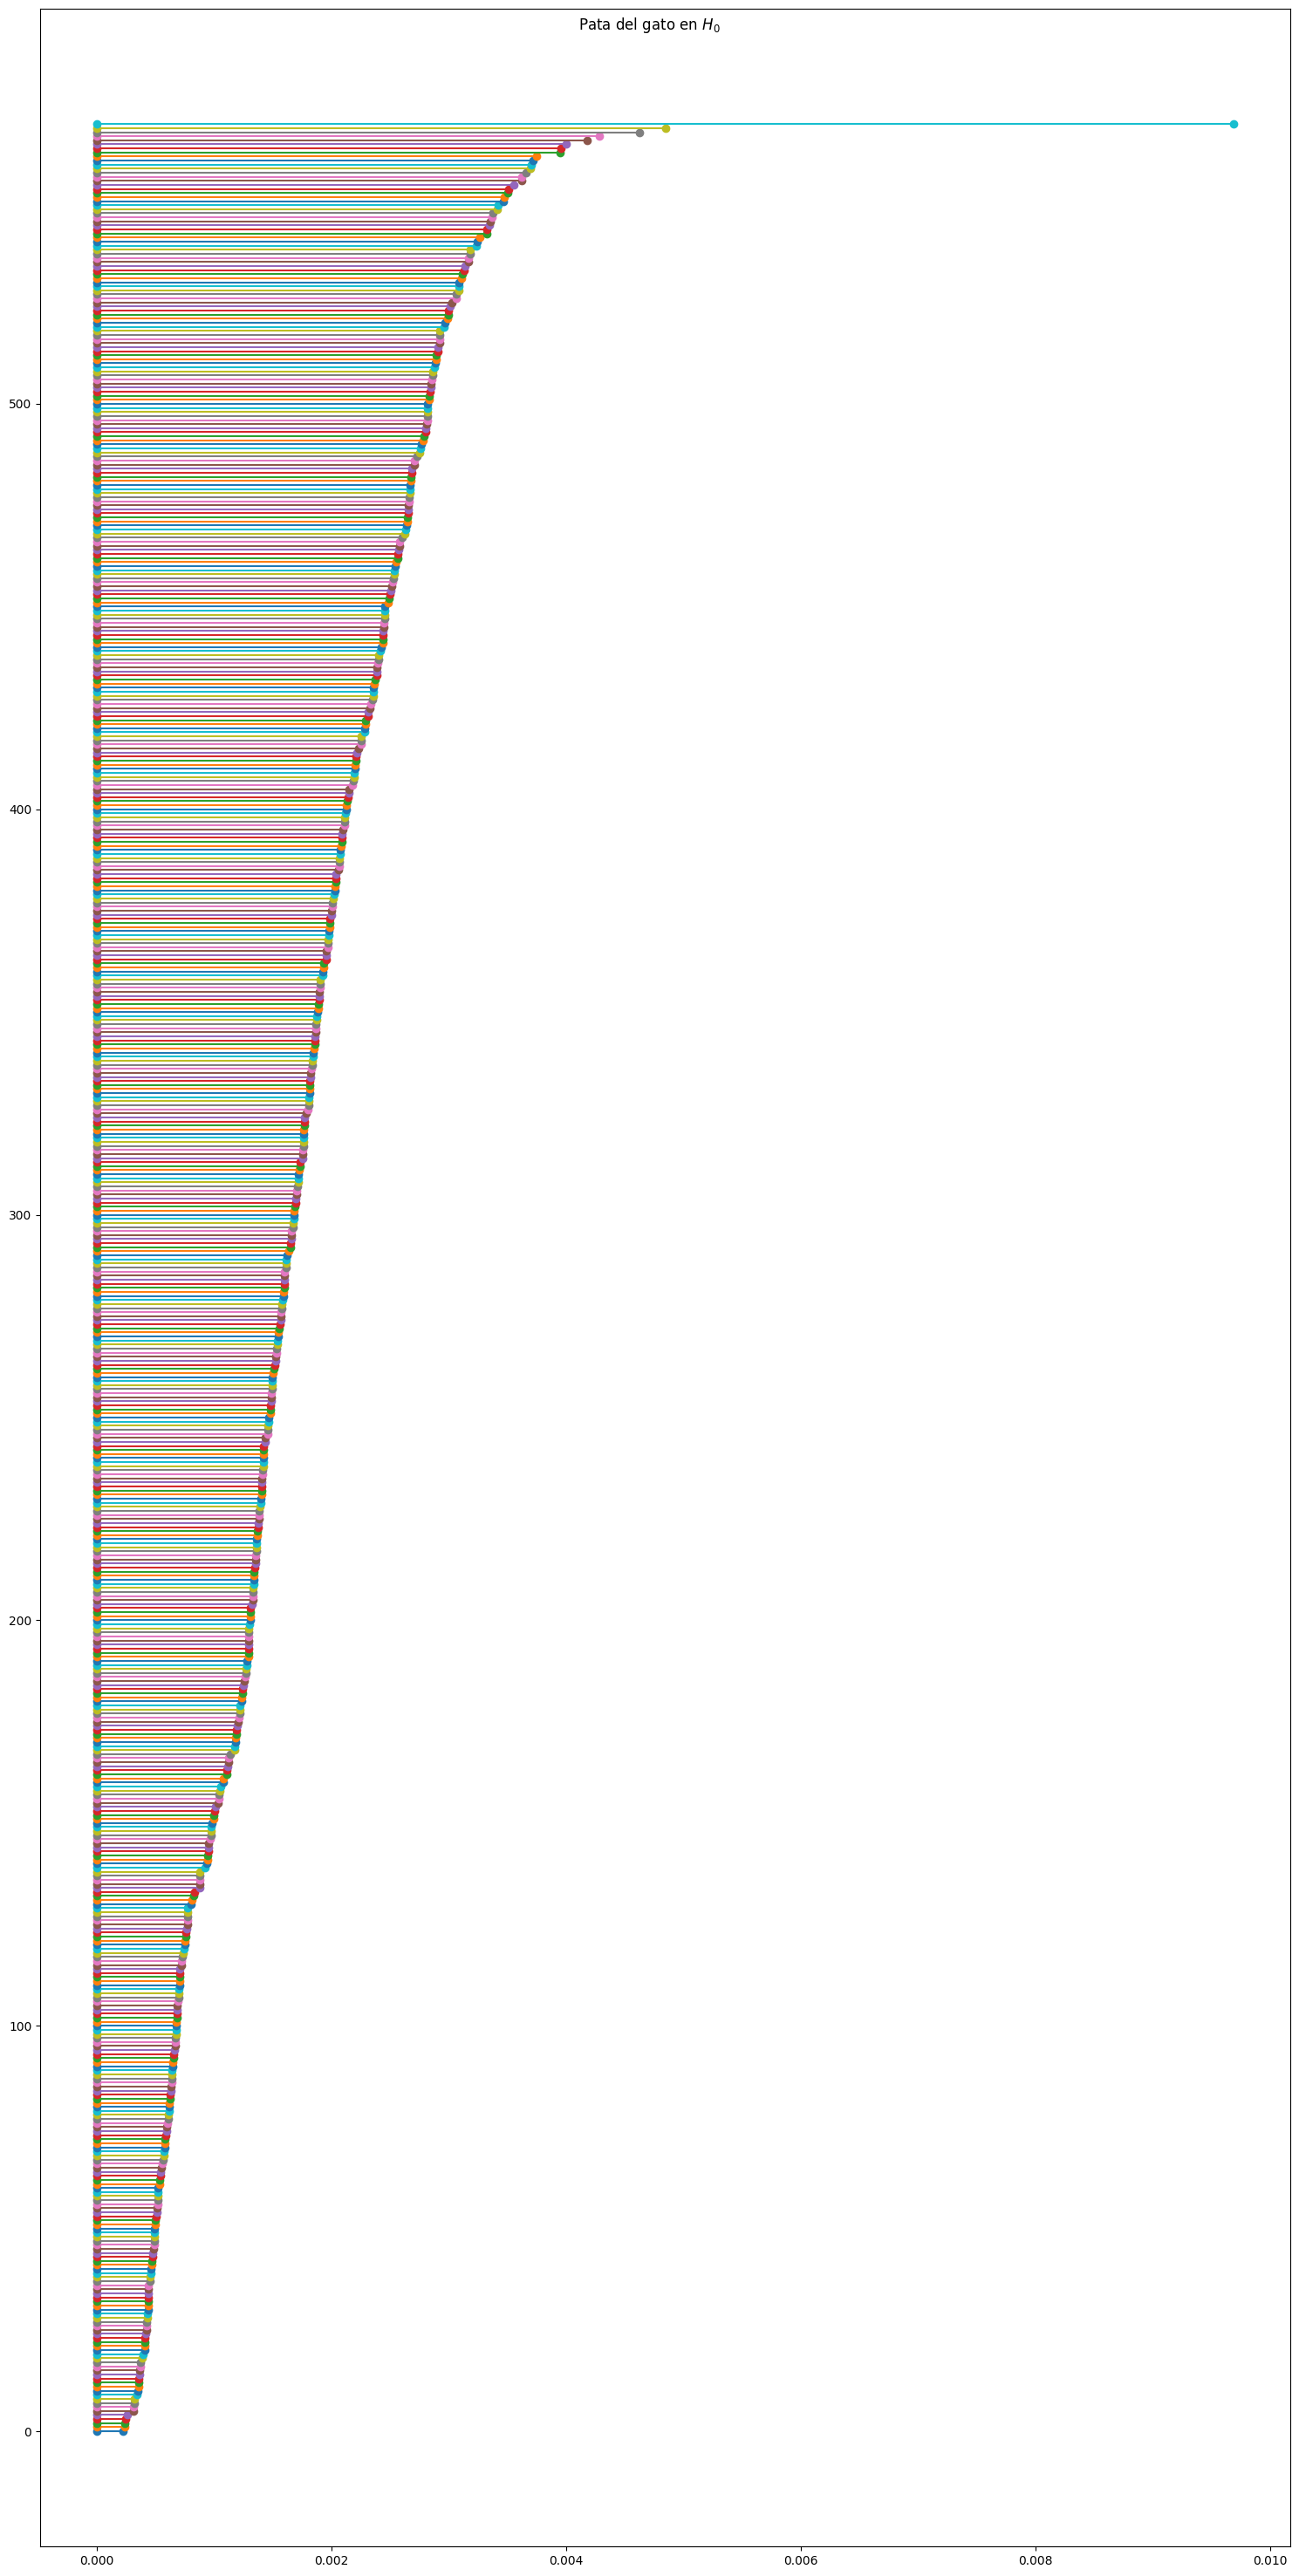

In [25]:
barcode_homology_persistence(data, "Pata del gato en $H_0$ ", 0)

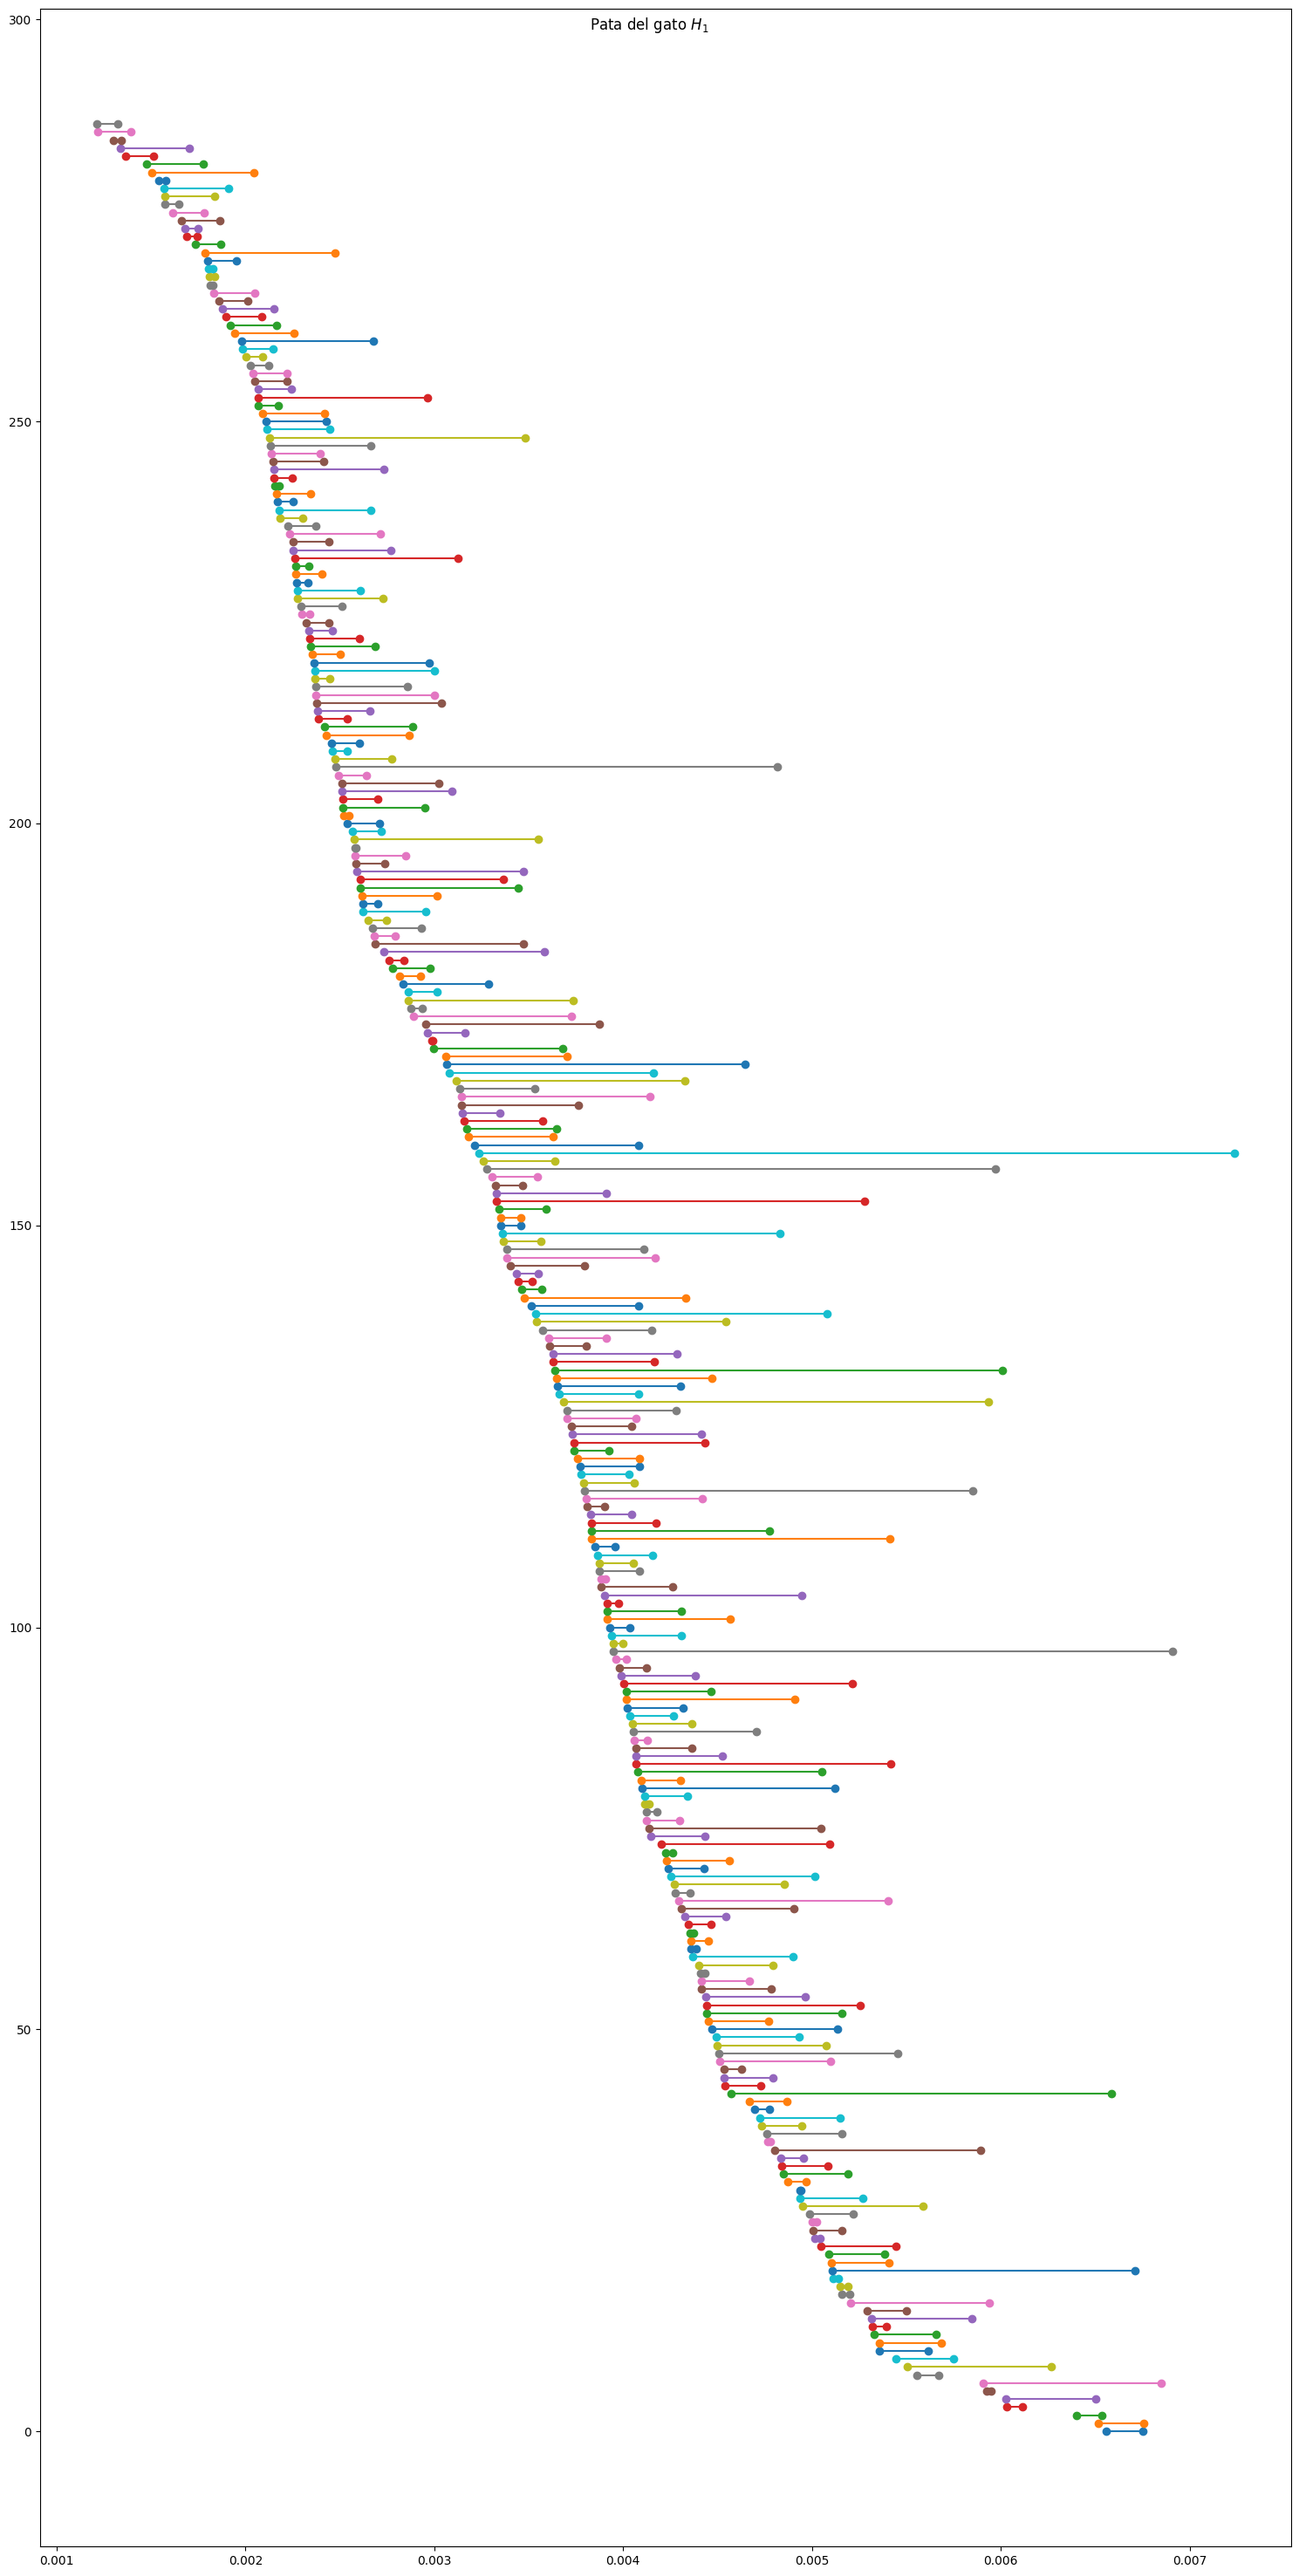

In [26]:
barcode_homology_persistence(data, "Pata del gato $H_1$ ", 1)

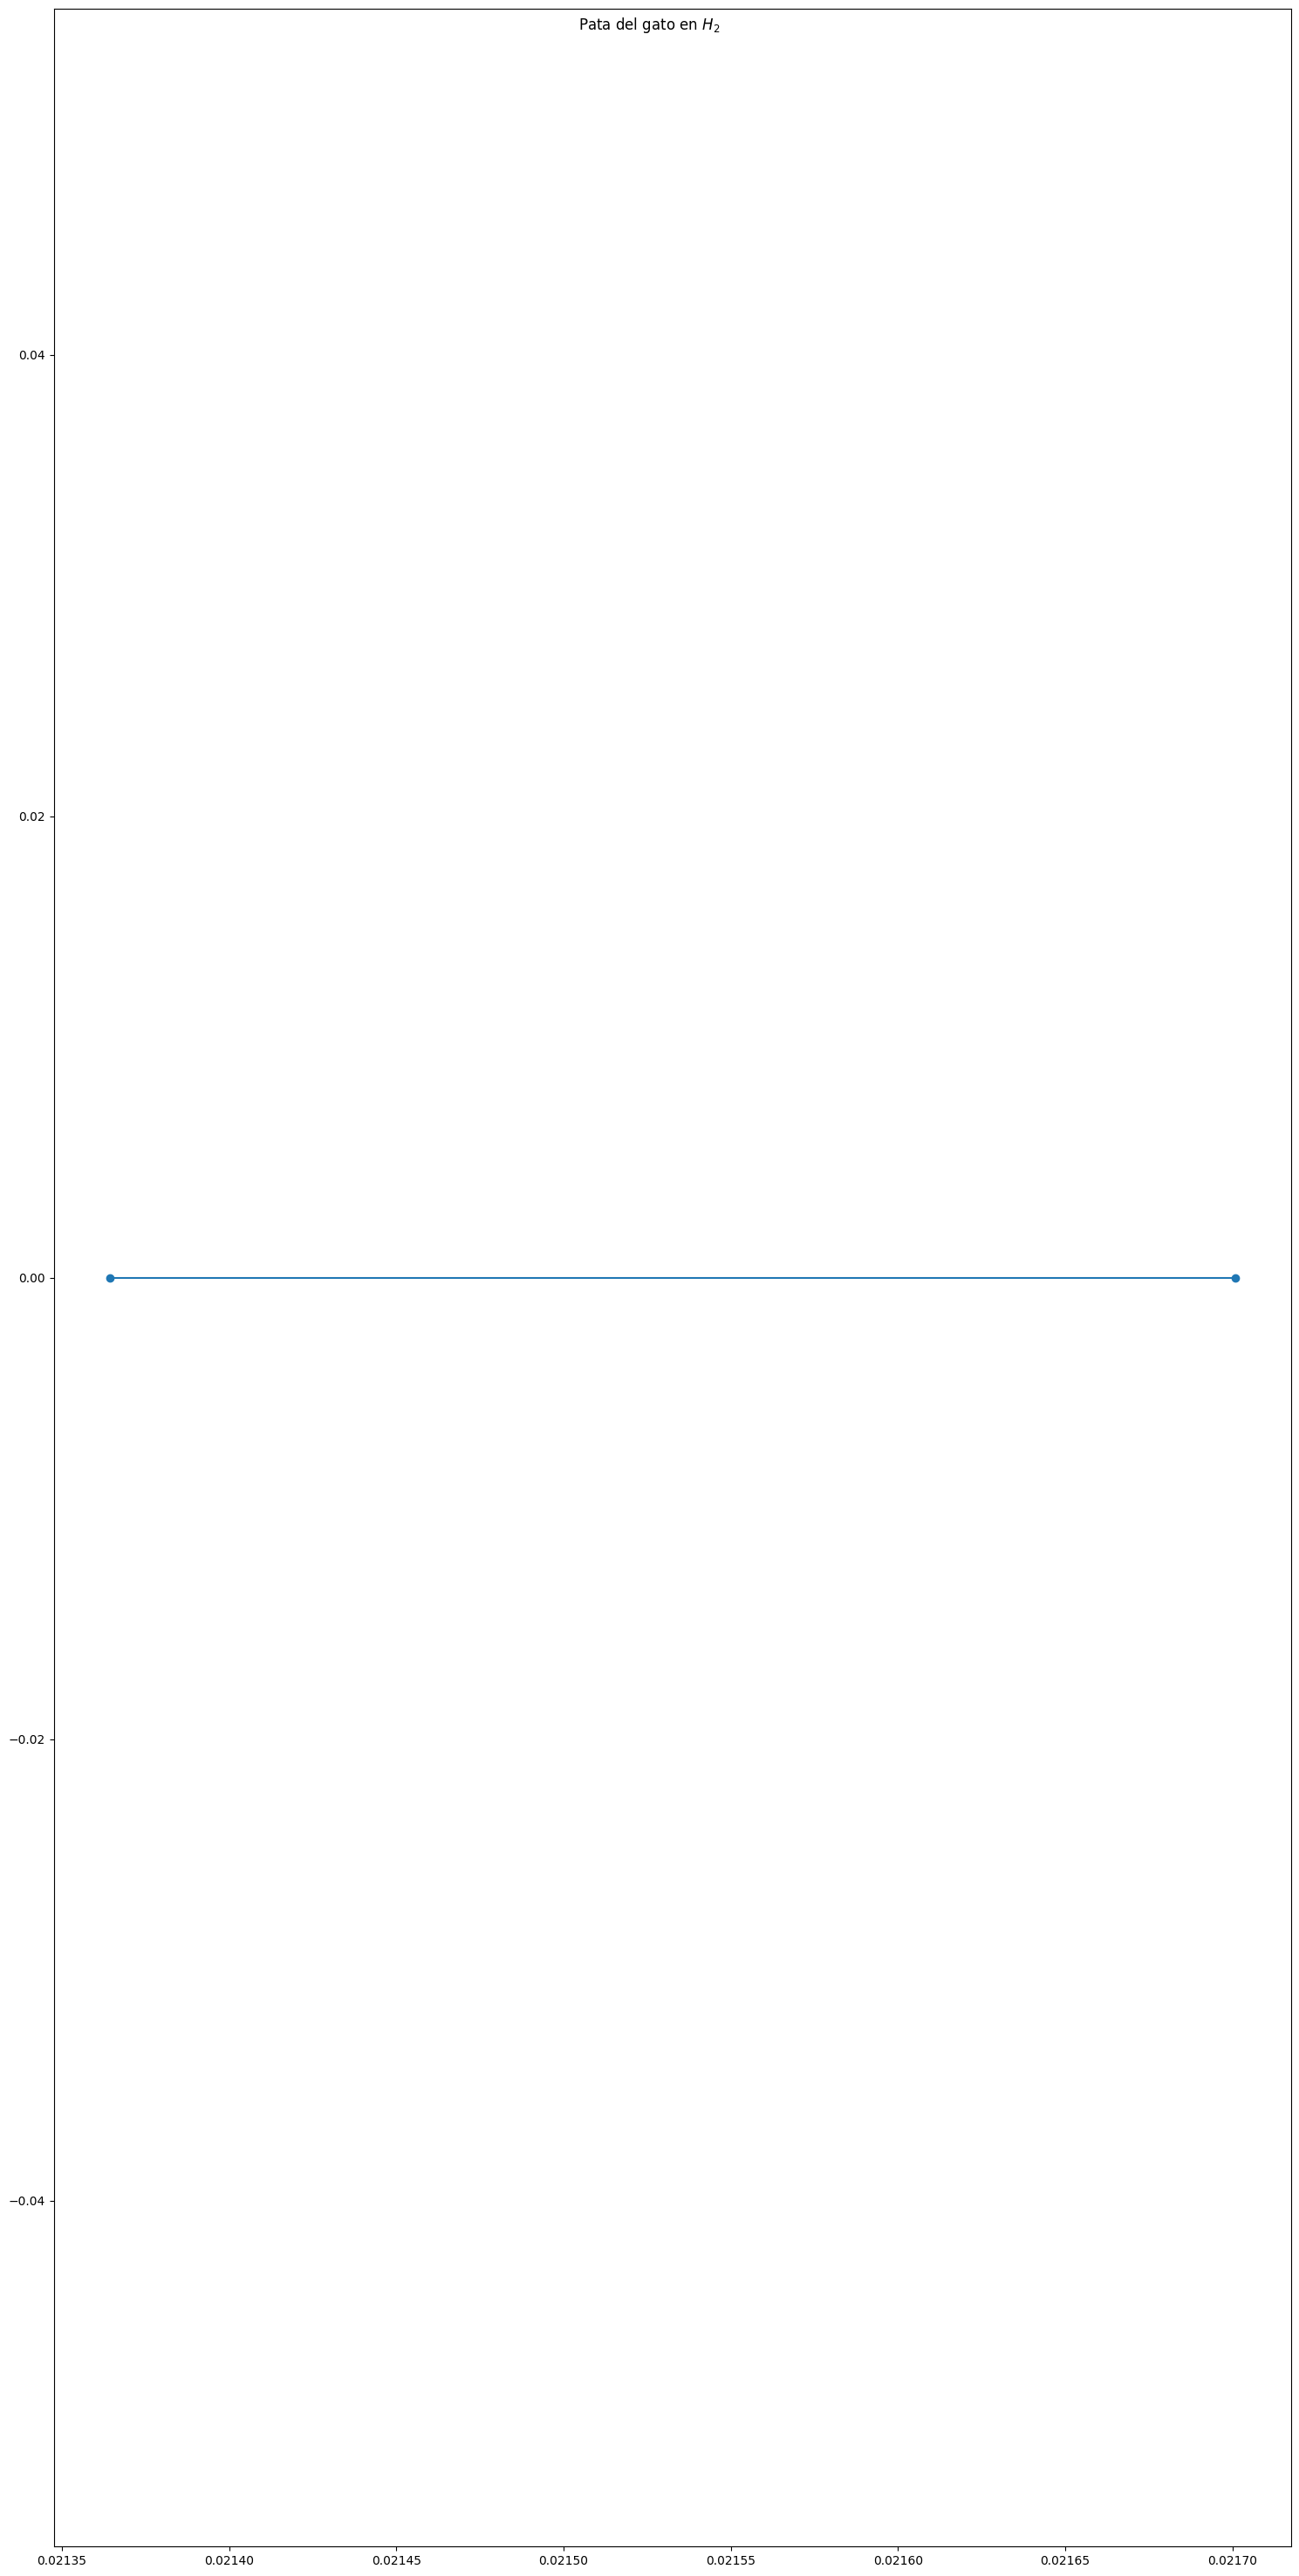

In [27]:
barcode_homology_persistence(data, "Pata del gato en $H_2$ ", 2)